# Clustering to impruve dataset 

## First import data

In [192]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import utils as ut
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

input_path = 'dataset/v5_cleaned_dataset.csv'
input_csv = pd.read_csv(input_path)

#rimuovi riga 2221 del dataset 
input_csv = input_csv.drop(2221)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

totaldf = pd.DataFrame(input_csv)

names = train.iloc[:,0].values
data  = train.iloc[:,1:].values

train.shape, y.shape




((2735, 70), (2735,))

# KMeans 

Num clusters: 1 | SSE: 1973643445.77
Num clusters: 2 | SSE: 1310142050.94
Num clusters: 3 | SSE: 847502851.80
Num clusters: 4 | SSE: 646487492.81
Num clusters: 5 | SSE: 589635912.41
Num clusters: 6 | SSE: 455599728.21
Num clusters: 7 | SSE: 361856004.36
Num clusters: 8 | SSE: 325564493.72
Num clusters: 9 | SSE: 289252463.25


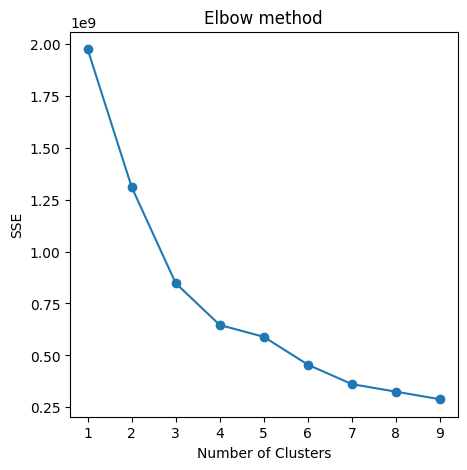

In [193]:
## -------------------
## Run the Clustering
## -------------------
k_values = range(1,10)
errors = []

for n_c in k_values:

    k_means = KMeans( n_clusters=n_c, # desired number of clusters
                      max_iter = 100, # max number of iterations
                      n_init = 1      # number of restarts
                    )
    k_means.fit(train)

    errors += [k_means.inertia_]    
    print (f"Num clusters: {n_c} | SSE: { k_means.inertia_:8.2f}")

fig, ax = plt.subplots(figsize=(5,5))

# plot data colored with labels
ax.plot(k_values, errors, 'o-')

ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SSE')
ax.set_title('Elbow method');


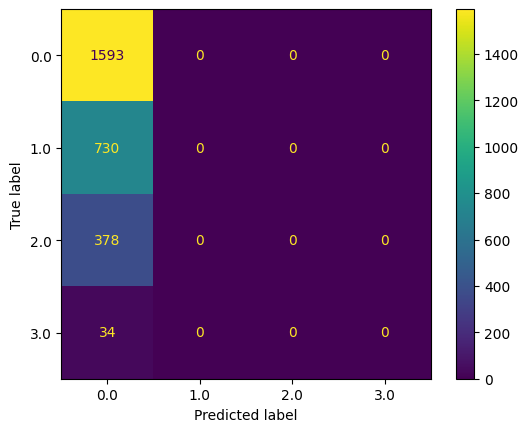

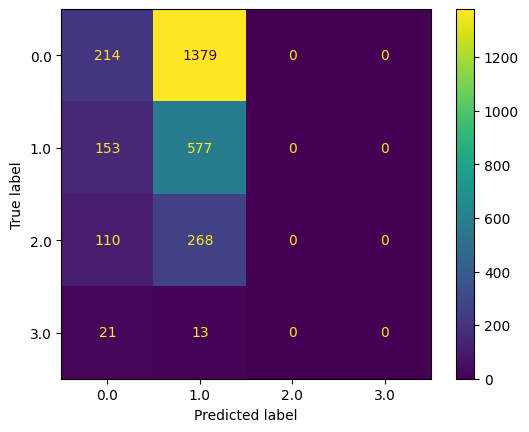

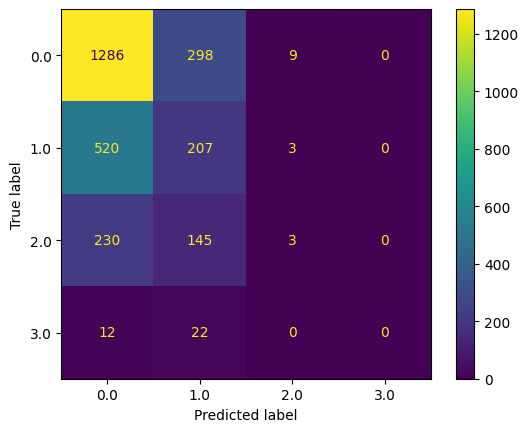

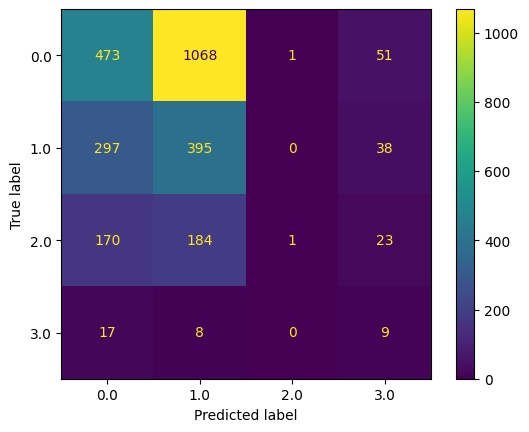

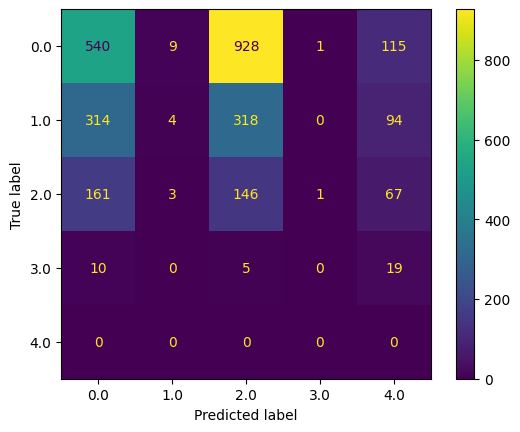

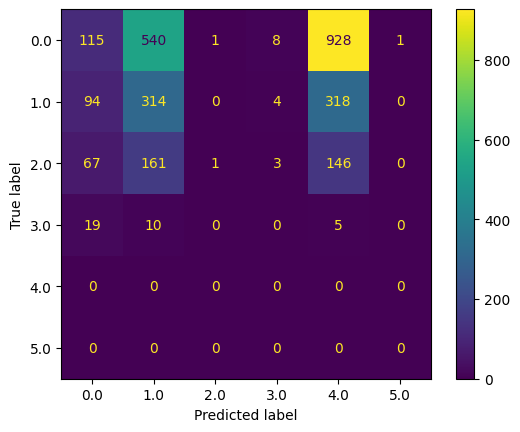

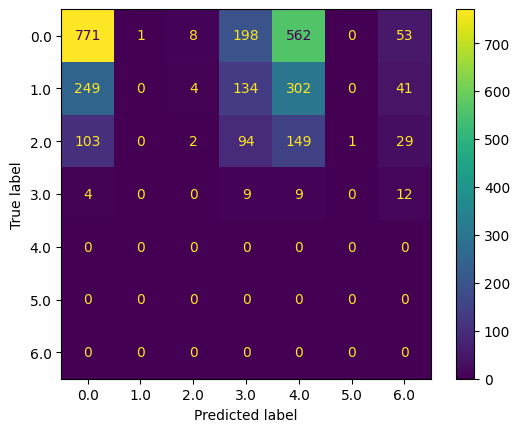

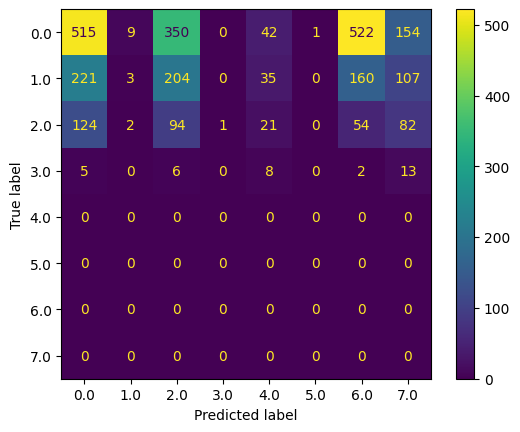

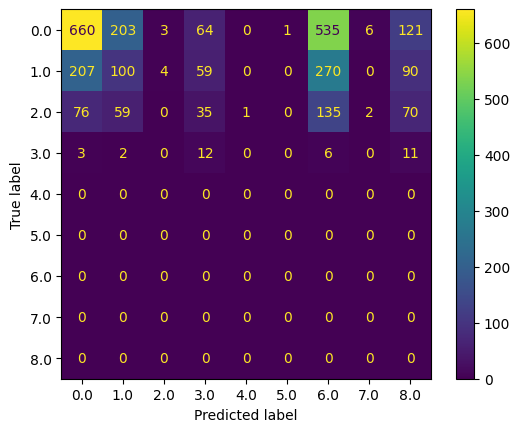

In [199]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans

for n_c in k_values:
    k_means = KMeans( n_clusters=n_c, max_iter = 100,n_init = 1)
    cluster = k_means.fit_predict(train)
    ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=cluster);
    



For n_clusters = 2 The average silhouette_score is : 0.994768111276839
For n_clusters = 3 The average silhouette_score is : 0.8864366128617299
For n_clusters = 4 The average silhouette_score is : 0.5597818558001546
For n_clusters = 5 The average silhouette_score is : 0.4649523226414979
For n_clusters = 6 The average silhouette_score is : 0.41920602501718285
For n_clusters = 7 The average silhouette_score is : 0.3647982383539023


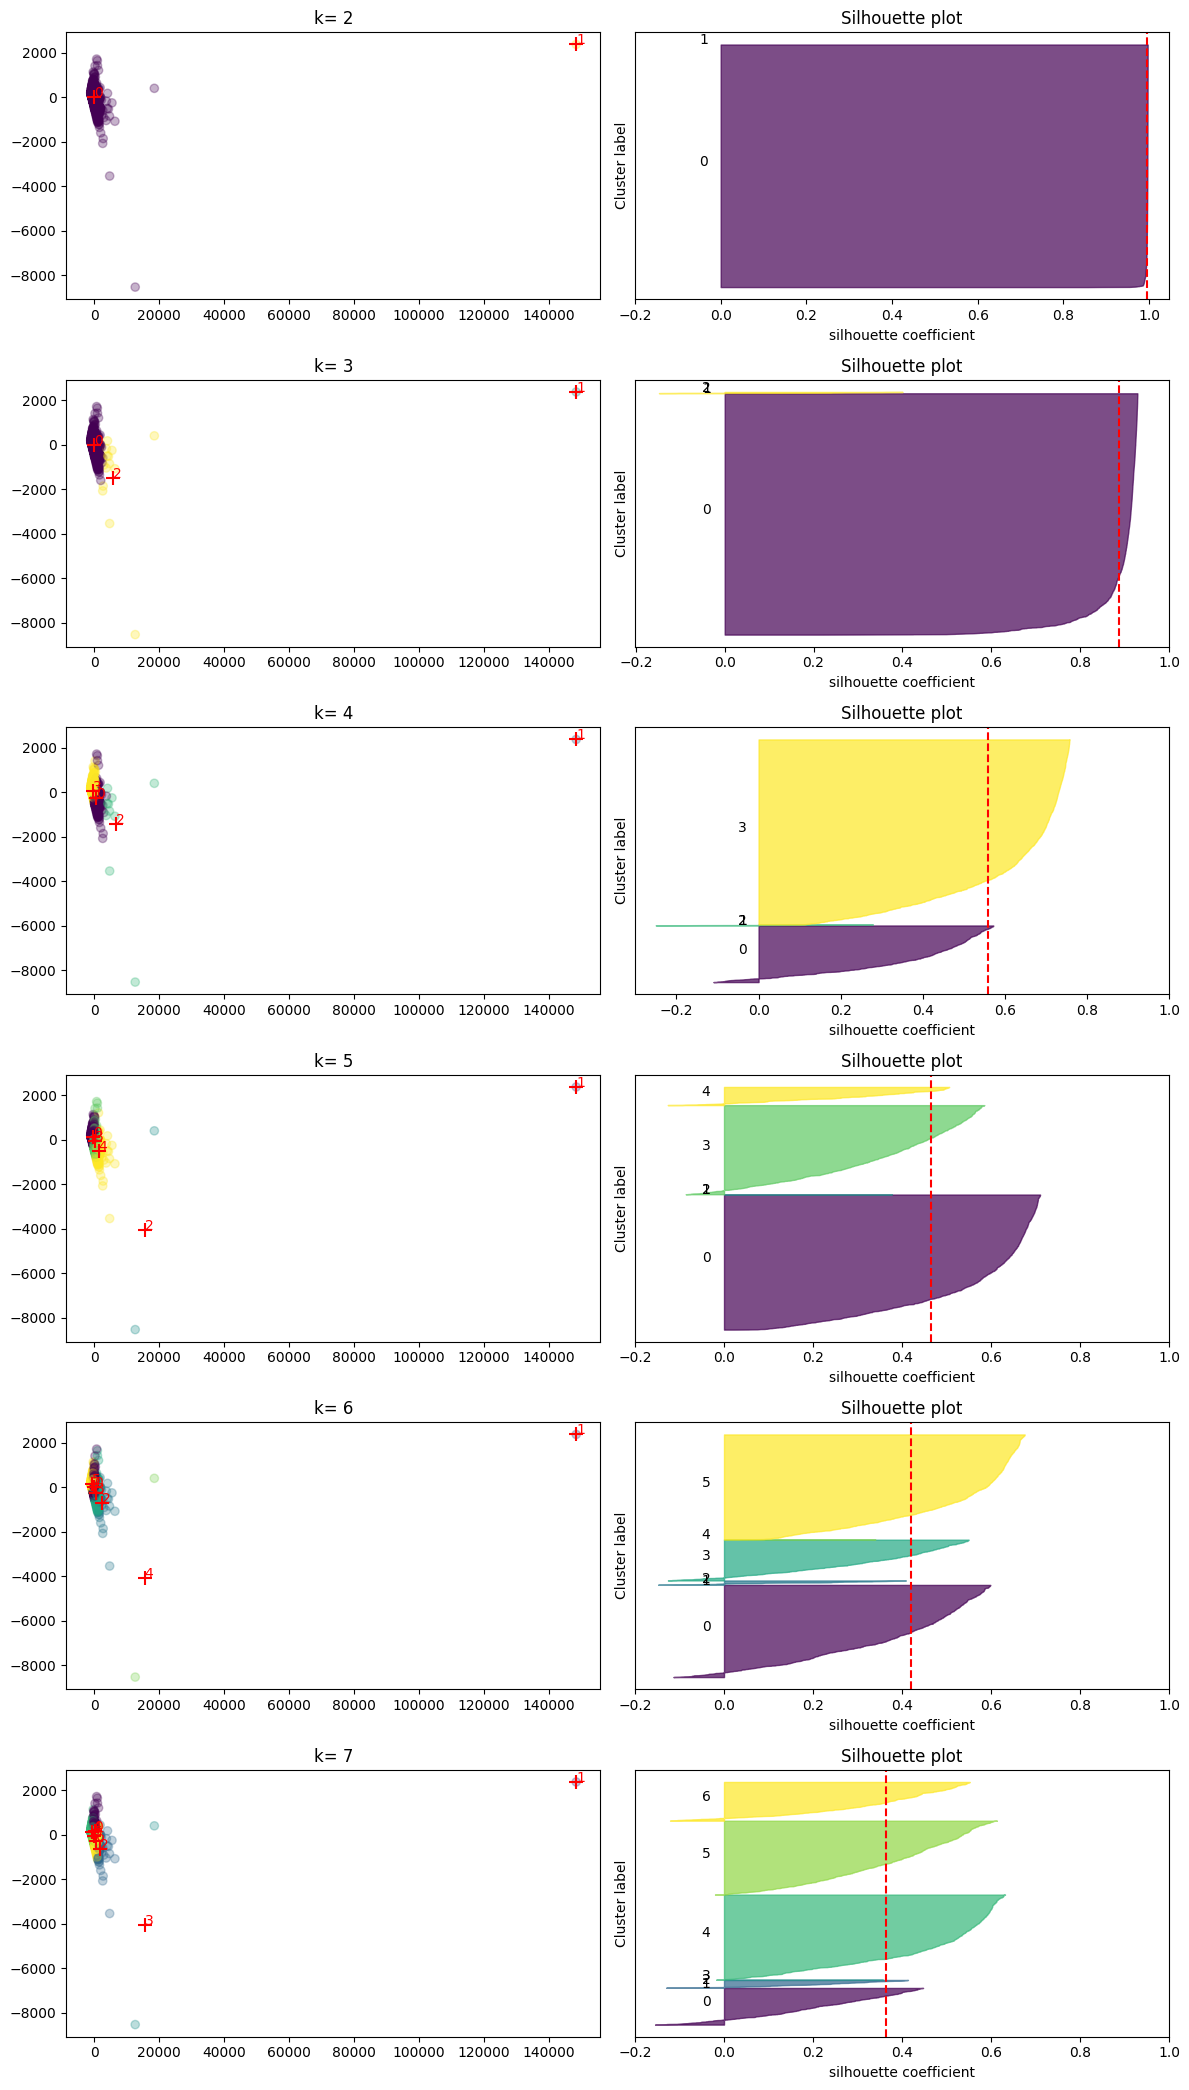

In [200]:
from sklearn.metrics import silhouette_samples, silhouette_score


n_clusters = [2,3,4,5,6,7]
fig, axs = plt.subplots(nrows=len(n_clusters), ncols=2, 
                        figsize=(12,21), tight_layout=True)

for i, n_c in enumerate(n_clusters):

    # -----------
    # K-Means
    k_means = KMeans(n_clusters=n_c, n_init=1)
    k_means.fit(X)
    
    
    # plot output of k-means
    axs[i,0].scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=0.3)
    c = k_means.cluster_centers_
    axs[i,0].scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
    
    for c_id in range(len(c)):
        axs[i,0].text(c[c_id,0]+.2, c[c_id,1]+.2, str(c_id), color='red')

    axs[i,0].set_title("k= "+str(n_c))
    
    # silhouette
    silhouette_avg = silhouette_score(X, k_means.labels_)
    print("For n_clusters =", n_c,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, k_means.labels_)

    y_lower = 0
    for j in range(n_c):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[k_means.labels_ == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(j) / (n_c-1))
        axs[i,1].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[i,1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper

    axs[i,1].set_title("Silhouette plot")
    axs[i,1].set_xlabel("silhouette coefficient")
    axs[i,1].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axs[i,1].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[i,1].set_yticks([])  # Clear the yaxis labels / ticks
    axs[i,1].set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Clustering Gerarchico


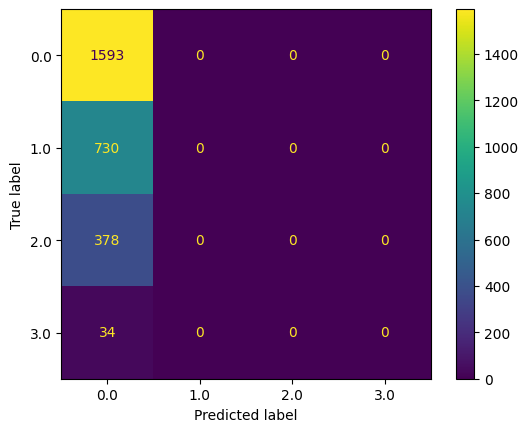

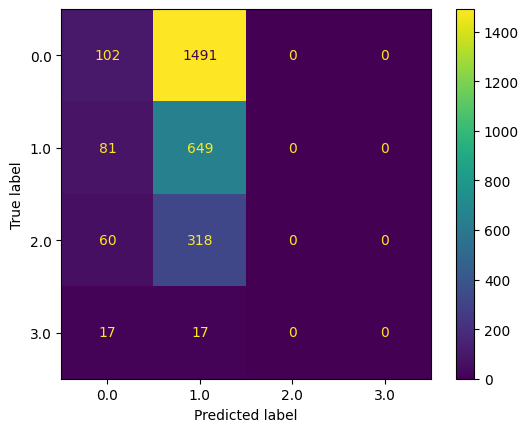

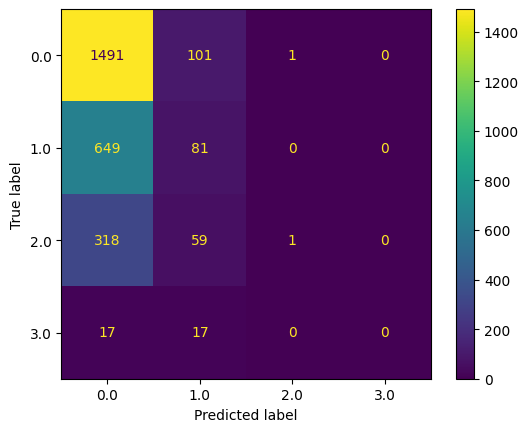

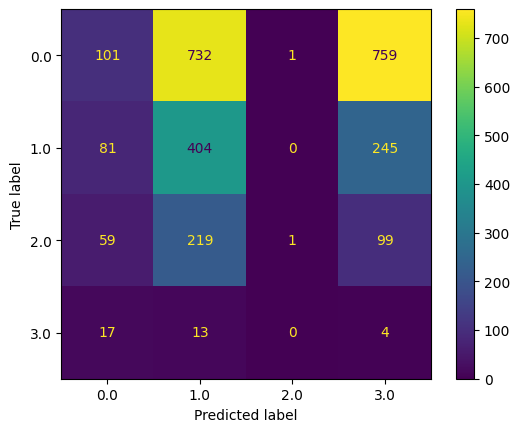

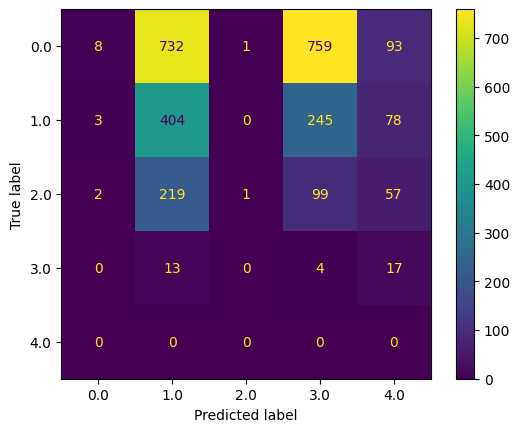

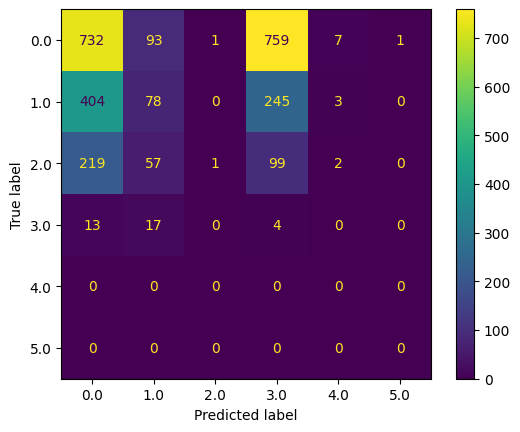

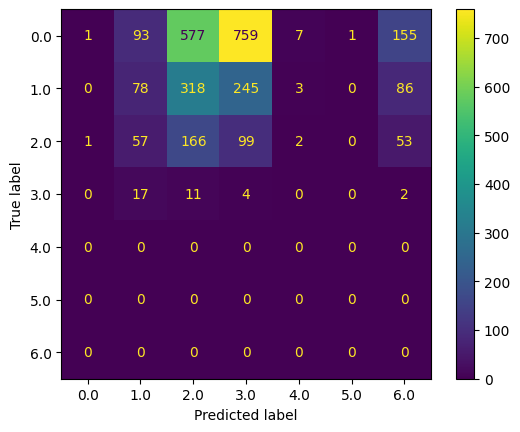

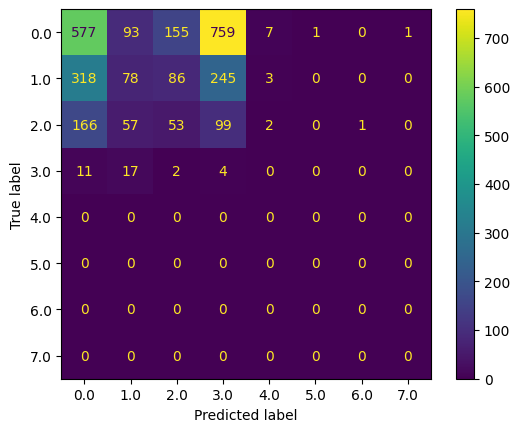

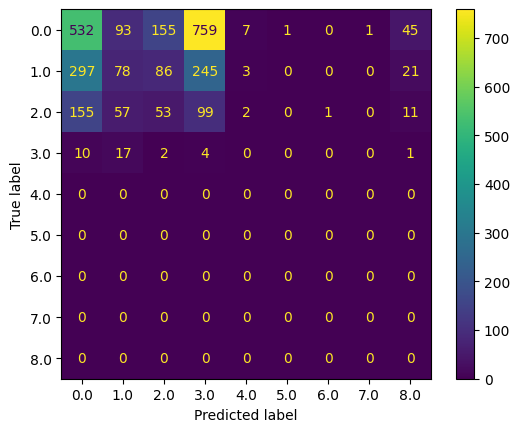

In [201]:
from sklearn.cluster import AgglomerativeClustering

k_values = range(1,10)

for n_c in k_values:
    cluster = AgglomerativeClustering( n_clusters=n_c)
    res = cluster.fit_predict(train)
    ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=res);
